In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'First digit in test data ')

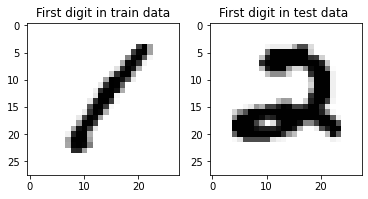

In [3]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("D:/AIML/mnist/datasets/mnist/train.csv")
mnist_test = pd.read_csv("D:/AIML/mnist/datasets/mnist/test.csv")
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")


In [6]:
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]


In [14]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50))
nn_model.fit(X_train,mnist_train.iloc[:,0])

MLPClassifier(hidden_layer_sizes=50)

In [8]:
print(nn_model.predict(mnist_test.iloc[0:1,]))

[2]


In [9]:
print("Accuracy of model:", nn_model.score(X_train,Y_train))

Accuracy of model: 0.9895952380952381


In [10]:
predicted_digit = nn_model.predict(X_train)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_train,predicted_digit),
             index=range(0,10),columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,4128,0,2,0,0,0,1,1,0,0
1,2,4664,8,1,1,0,2,2,4,0
2,35,0,4116,1,10,0,0,11,3,1
3,18,0,20,4256,0,23,0,0,9,25
4,7,3,2,0,4047,0,3,0,1,9
5,13,0,2,5,1,3752,8,0,5,9
6,4,0,0,0,0,8,4125,0,0,0
7,4,0,7,1,0,1,0,4387,1,0
8,49,0,16,1,6,24,12,0,3945,10
9,17,0,0,1,6,3,0,15,3,4143


In [11]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4132
           1       1.00      1.00      1.00      4684
           2       0.99      0.99      0.99      4177
           3       1.00      0.98      0.99      4351
           4       0.99      0.99      0.99      4072
           5       0.98      0.99      0.99      3795
           6       0.99      1.00      1.00      4137
           7       0.99      1.00      1.00      4401
           8       0.99      0.97      0.98      4063
           9       0.99      0.99      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000

